STARTING COMPREHENSIVE PARAMETER SWEEP ANALYSIS

TASK 1: COMPREHENSIVE PARAMETER SWEEP ANALYSIS
Sweeping Parameters:
Voltage Range: -1.0 to 1.0 V (41 points)
Frequency Range: 1.0 to 10.0 GHz (19 points)
Wavelength Range: 3.00 to 29.98 cm
W2 Range: 15.0 to 120.1 μm (5255 points)
Poly-Si Thickness Range: 100.0 to 3000.0 nm (146 points)

Performing comprehensive parameter sweep...
Progress: 0.0%
Progress: 0.0%
Progress: 0.0%
Progress: 0.0%
Progress: 0.0%
Progress: 0.0%
Progress: 0.0%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.1%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.2%
Progress: 0.3%
Progress: 0.3%
Progress: 0.3%
Progress: 0.3%
Progress: 0.3%
Prog

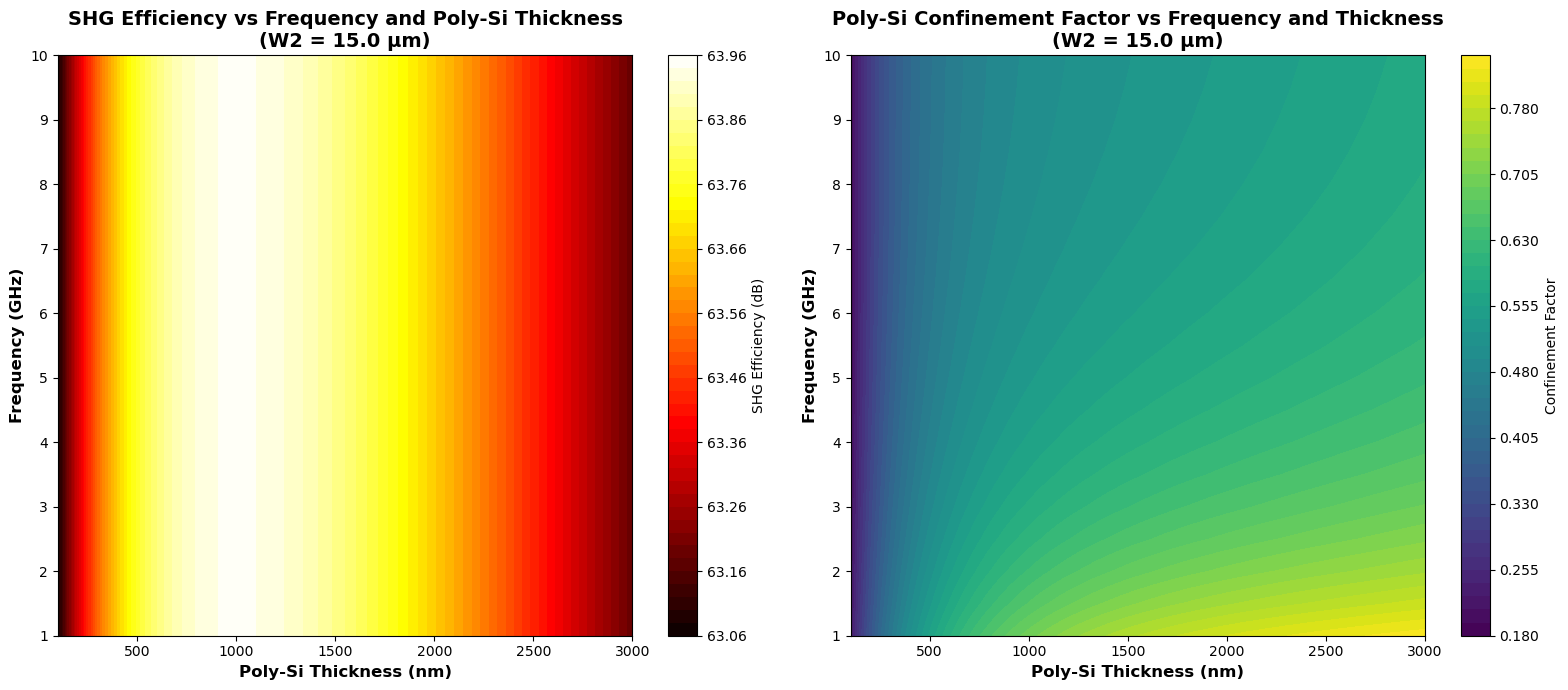

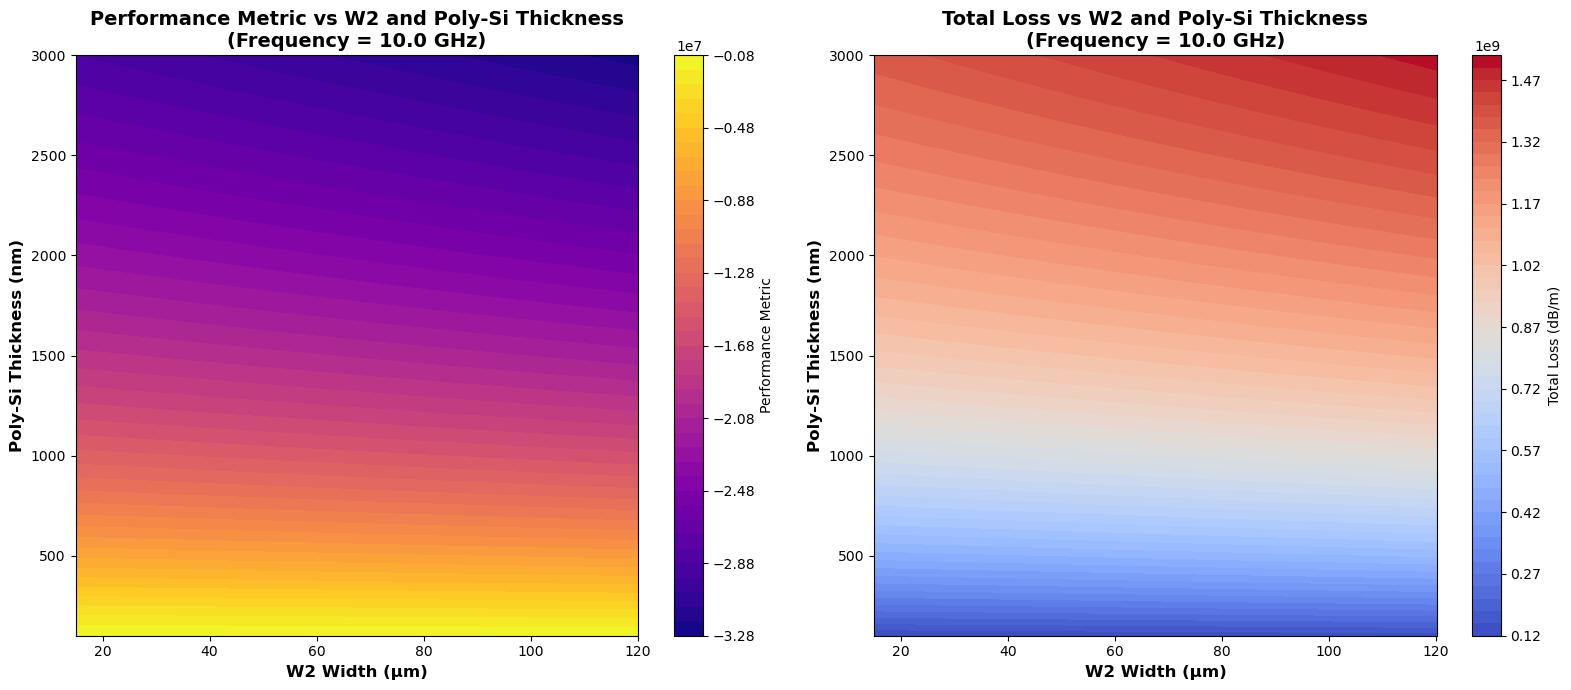


Finding optimal parameters...

OPTIMAL PARAMETERS FOUND:
Optimal Frequency: 6.00 GHz
Optimal Poly-Si Thickness: 100.0 nm
Optimal W2 Width: 15.00 μm
Maximum Performance Metric: -820876.3308
SHG Efficiency at Optimal: 63.06 dB
Total Loss at Optimal: 117365683.124 dB/m

TASK 2: OPTIMAL WAVEGUIDE STRUCTURE VISUALIZATION


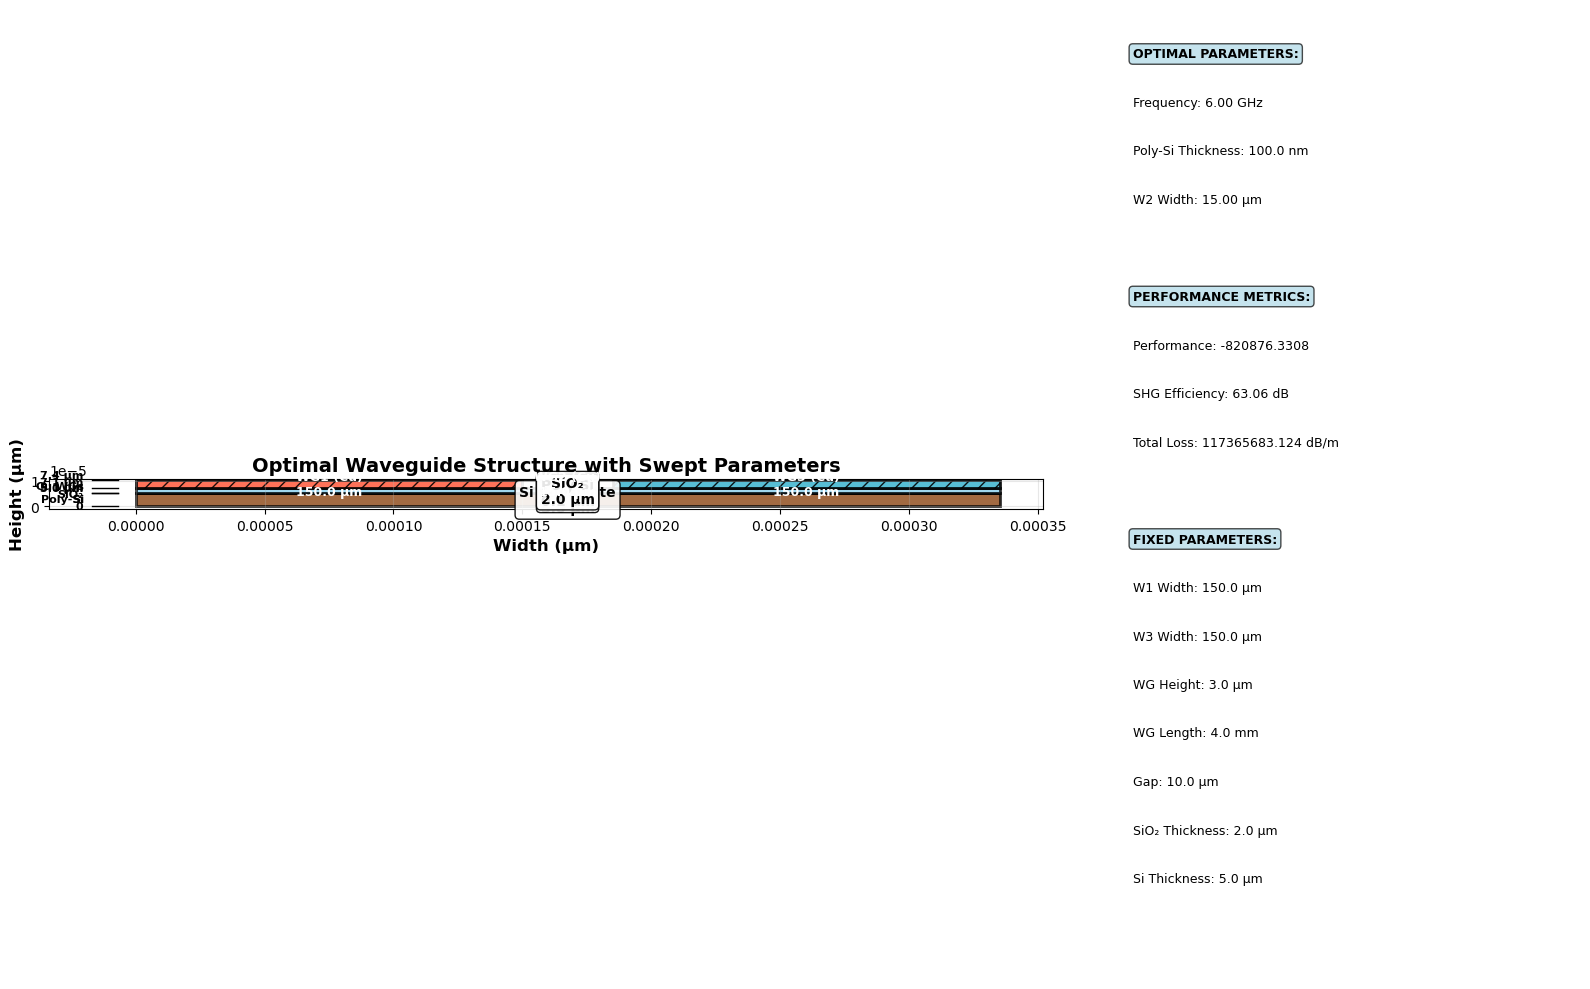

✓ Optimal waveguide structure visualized
✓ All swept parameters displayed

TASK 3: VOLTAGE AND FREQUENCY DEPENDENCE ANALYSIS


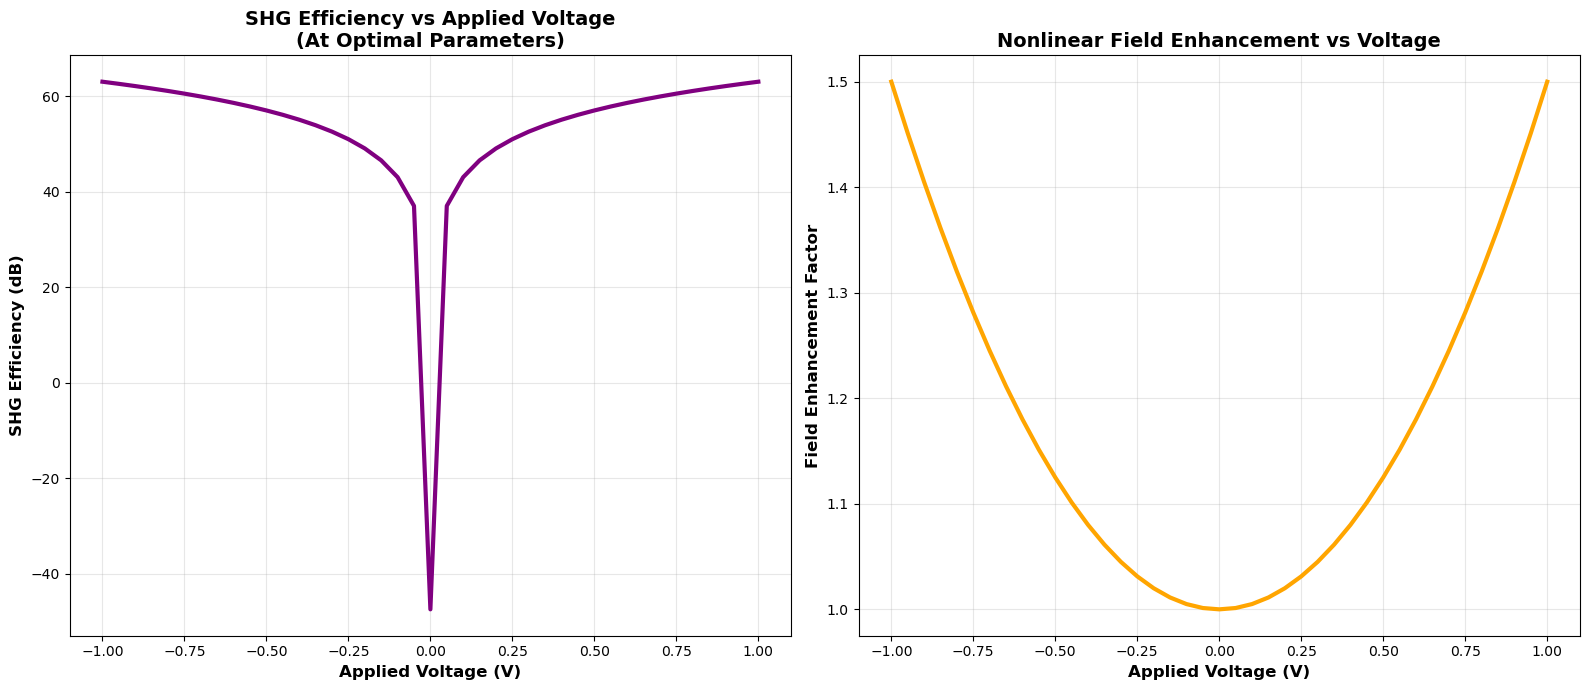

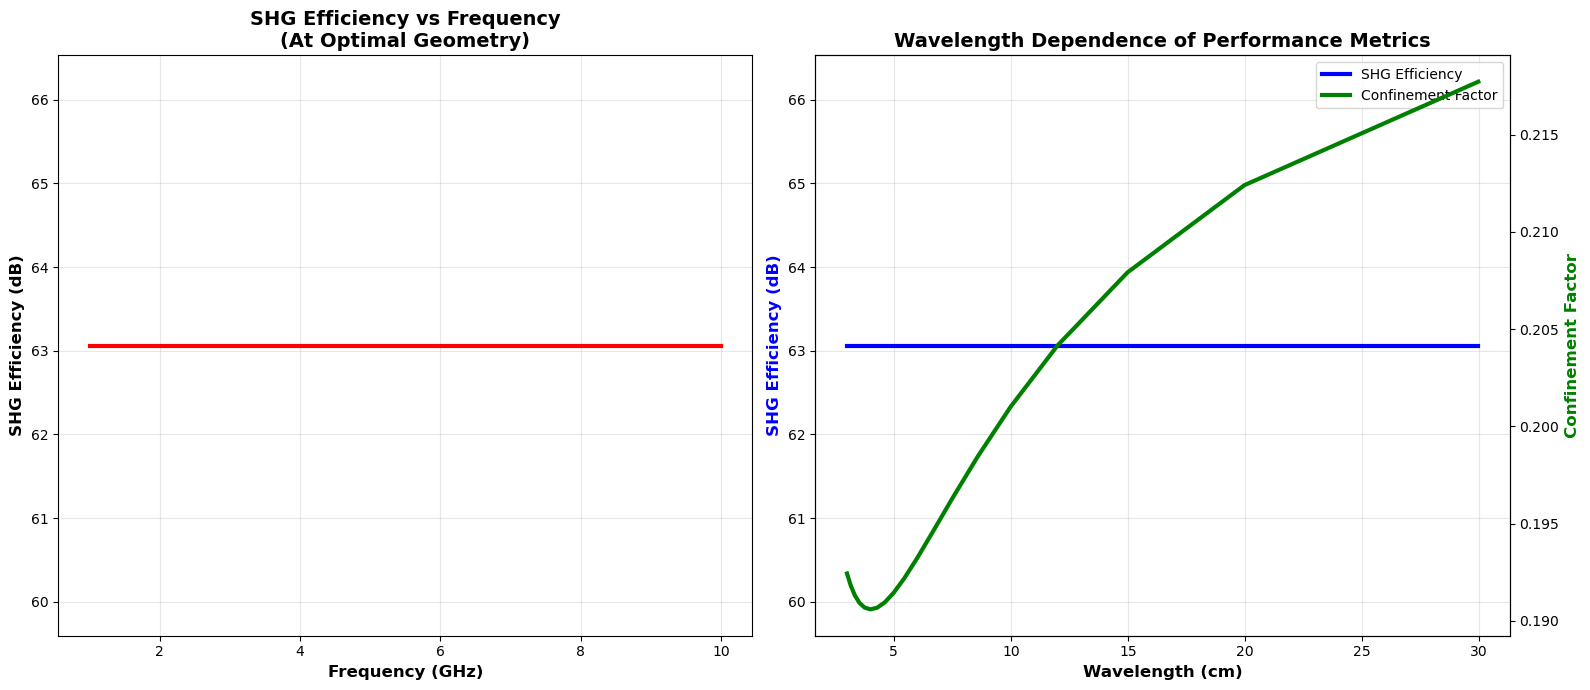

✓ Voltage dependence analyzed
✓ Frequency and wavelength dependence characterized

COMPREHENSIVE ANALYSIS COMPLETED SUCCESSFULLY!

FINAL OPTIMAL CONFIGURATION SUMMARY:
• Optimal Frequency: 6.00 GHz
• Optimal W2 Width: 15.00 μm
• Optimal Poly-Si Thickness: 100.0 nm
• Peak Performance: -820876.3308
• SHG Efficiency: 63.06 dB
• Total Loss: 117365683.124 dB/m


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.constants import c, epsilon_0, mu_0, pi
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import minimize_scalar

class ComprehensiveWaveguideSweepAnalysis:
    def __init__(self):
        # Physical constants
        self.c = c
        self.epsilon_0 = epsilon_0
        self.mu_0 = mu_0
        
        # Material properties
        self.n_si = 3.45
        self.n_polysi = 3.50
        self.n_sio2 = 1.45
        self.n_cu = 0.20 + 10.8j
        
        # Parameter ranges for sweeping
        self.voltage_range = np.linspace(-1, 1, 41)  # -1V to 1V, 41 points
        self.freq_range = np.arange(1e9, 10.1e9, 0.5e9)  # 1-10 GHz, step 0.5 GHz
        self.wavelength_range = self.c / self.freq_range
        
        # Waveguide dimensions ranges
        self.W1 = 150e-6  # Fixed
        self.W2_range = np.arange(15e-6, 120.1e-6, 20e-9)  # 15-120 μm, step 20 nm
        self.W3 = 150e-6  # Fixed
        self.L = 4e-3  # Fixed length for all waveguides
        self.gap = 10e-6  # Fixed gap
        self.H_wg = 3e-6  # Waveguide height
        
        # Layer thicknesses ranges
        self.t_sio2 = 2e-6  # Fixed SiO2 thickness
        self.t_polysi_range = np.arange(0.1e-6, 3.01e-6, 20e-9)  # 0.1-3 μm, step 20 nm
        self.t_si = 5e-6  # Fixed Si thickness
        
        # Store optimal parameters
        self.optimal_params = {}
        self.simulation_results = {}

    # =========================================================================
    # TASK 1: PARAMETER SWEEP ANALYSIS
    # =========================================================================
    def task1_parameter_sweep_analysis(self):
        """Task 1: Comprehensive parameter sweep analysis"""
        print("\n" + "="*70)
        print("TASK 1: COMPREHENSIVE PARAMETER SWEEP ANALYSIS")
        print("="*70)
        
        print("Sweeping Parameters:")
        print(f"Voltage Range: {self.voltage_range[0]:.1f} to {self.voltage_range[-1]:.1f} V ({len(self.voltage_range)} points)")
        print(f"Frequency Range: {self.freq_range[0]/1e9:.1f} to {self.freq_range[-1]/1e9:.1f} GHz ({len(self.freq_range)} points)")
        print(f"Wavelength Range: {self.wavelength_range[-1]*100:.2f} to {self.wavelength_range[0]*100:.2f} cm")
        print(f"W2 Range: {self.W2_range[0]*1e6:.1f} to {self.W2_range[-1]*1e6:.1f} μm ({len(self.W2_range)} points)")
        print(f"Poly-Si Thickness Range: {self.t_polysi_range[0]*1e9:.1f} to {self.t_polysi_range[-1]*1e9:.1f} nm ({len(self.t_polysi_range)} points)")
        
        # Perform parameter sweep
        self.perform_comprehensive_sweep()
        
        # Plot sweep results
        self.plot_sweep_results()

    def perform_comprehensive_sweep(self):
        """Perform comprehensive parameter sweep"""
        print("\nPerforming comprehensive parameter sweep...")
        
        # Initialize results storage
        self.simulation_results = {
            'shg_efficiency': np.zeros((len(self.freq_range), len(self.t_polysi_range), len(self.W2_range))),
            'total_loss': np.zeros((len(self.freq_range), len(self.t_polysi_range), len(self.W2_range))),
            'confinement_polysi': np.zeros((len(self.freq_range), len(self.t_polysi_range), len(self.W2_range))),
            'performance_metric': np.zeros((len(self.freq_range), len(self.t_polysi_range), len(self.W2_range)))
        }
        
        # Fixed voltage for initial sweep
        fixed_voltage = 1.0
        
        # Perform 3D parameter sweep
        total_iterations = len(self.freq_range) * len(self.t_polysi_range) * len(self.W2_range)
        current_iteration = 0
        
        for i, freq in enumerate(self.freq_range):
            for j, t_polysi in enumerate(self.t_polysi_range):
                for k, W2 in enumerate(self.W2_range):
                    current_iteration += 1
                    
                    # Calculate performance metrics
                    shg_eff = self.calculate_shg_efficiency(freq, W2, t_polysi, fixed_voltage)
                    total_loss = self.calculate_total_loss(freq, W2, t_polysi, fixed_voltage)
                    cf_polysi = self.calculate_confinement_factors(freq, t_polysi)['Poly-Si']
                    
                    # Store results
                    self.simulation_results['shg_efficiency'][i, j, k] = shg_eff
                    self.simulation_results['total_loss'][i, j, k] = total_loss
                    self.simulation_results['confinement_polysi'][i, j, k] = cf_polysi
                    self.simulation_results['performance_metric'][i, j, k] = cf_polysi * (1 - total_loss/100) * (shg_eff + 10)/20
                    
                    if current_iteration % 1000 == 0:
                        progress = (current_iteration / total_iterations) * 100
                        print(f"Progress: {progress:.1f}%")
        
        print("Parameter sweep completed!")

    def plot_sweep_results(self):
        """Plot comprehensive sweep results"""
        print("\nPlotting sweep results...")
        
        # Plot 1: Frequency vs Poly-Si thickness at optimal W2
        fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
        
        # Find optimal W2 index
        avg_performance = np.mean(self.simulation_results['performance_metric'], axis=(0, 1))
        optimal_W2_idx = np.argmax(avg_performance)
        optimal_W2 = self.W2_range[optimal_W2_idx]
        
        # Plot SHG efficiency vs frequency and Poly-Si thickness
        shg_optimal_W2 = self.simulation_results['shg_efficiency'][:, :, optimal_W2_idx]
        im1 = ax1.contourf(self.t_polysi_range*1e9, self.freq_range/1e9, shg_optimal_W2, levels=50, cmap='hot')
        ax1.set_xlabel('Poly-Si Thickness (nm)', fontsize=12, weight='bold')
        ax1.set_ylabel('Frequency (GHz)', fontsize=12, weight='bold')
        ax1.set_title(f'SHG Efficiency vs Frequency and Poly-Si Thickness\n(W2 = {optimal_W2*1e6:.1f} μm)', fontsize=14, weight='bold')
        plt.colorbar(im1, ax=ax1, label='SHG Efficiency (dB)')
        
        # Plot confinement factors
        cf_optimal_W2 = self.simulation_results['confinement_polysi'][:, :, optimal_W2_idx]
        im2 = ax2.contourf(self.t_polysi_range*1e9, self.freq_range/1e9, cf_optimal_W2, levels=50, cmap='viridis')
        ax2.set_xlabel('Poly-Si Thickness (nm)', fontsize=12, weight='bold')
        ax2.set_ylabel('Frequency (GHz)', fontsize=12, weight='bold')
        ax2.set_title(f'Poly-Si Confinement Factor vs Frequency and Thickness\n(W2 = {optimal_W2*1e6:.1f} μm)', fontsize=14, weight='bold')
        plt.colorbar(im2, ax=ax2, label='Confinement Factor')
        
        plt.tight_layout()
        plt.show()
        
        # Plot 2: W2 vs Poly-Si thickness at optimal frequency
        fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 7))
        
        # Find optimal frequency index
        avg_performance_freq = np.mean(self.simulation_results['performance_metric'], axis=(1, 2))
        optimal_freq_idx = np.argmax(avg_performance_freq)
        optimal_freq = self.freq_range[optimal_freq_idx]
        
        # Plot performance metric vs W2 and Poly-Si thickness
        performance_optimal_freq = self.simulation_results['performance_metric'][optimal_freq_idx, :, :]
        im3 = ax3.contourf(self.W2_range*1e6, self.t_polysi_range*1e9, performance_optimal_freq, levels=50, cmap='plasma')
        ax3.set_xlabel('W2 Width (μm)', fontsize=12, weight='bold')
        ax3.set_ylabel('Poly-Si Thickness (nm)', fontsize=12, weight='bold')
        ax3.set_title(f'Performance Metric vs W2 and Poly-Si Thickness\n(Frequency = {optimal_freq/1e9:.1f} GHz)', fontsize=14, weight='bold')
        plt.colorbar(im3, ax=ax3, label='Performance Metric')
        
        # Plot total loss
        loss_optimal_freq = self.simulation_results['total_loss'][optimal_freq_idx, :, :]
        im4 = ax4.contourf(self.W2_range*1e6, self.t_polysi_range*1e9, loss_optimal_freq, levels=50, cmap='coolwarm')
        ax4.set_xlabel('W2 Width (μm)', fontsize=12, weight='bold')
        ax4.set_ylabel('Poly-Si Thickness (nm)', fontsize=12, weight='bold')
        ax4.set_title(f'Total Loss vs W2 and Poly-Si Thickness\n(Frequency = {optimal_freq/1e9:.1f} GHz)', fontsize=14, weight='bold')
        plt.colorbar(im4, ax=ax4, label='Total Loss (dB/m)')
        
        plt.tight_layout()
        plt.show()
        
        # Find and display optimal parameters
        self.find_optimal_parameters()

    def find_optimal_parameters(self):
        """Find optimal parameters from sweep results"""
        print("\nFinding optimal parameters...")
        
        # Find global maximum in performance metric
        max_perf_idx = np.unravel_index(np.argmax(self.simulation_results['performance_metric']), 
                                      self.simulation_results['performance_metric'].shape)
        
        optimal_freq_idx, optimal_t_polysi_idx, optimal_W2_idx = max_perf_idx
        
        self.optimal_params = {
            'frequency': self.freq_range[optimal_freq_idx],
            't_polysi': self.t_polysi_range[optimal_t_polysi_idx],
            'W2': self.W2_range[optimal_W2_idx],
            'performance': self.simulation_results['performance_metric'][max_perf_idx],
            'shg_efficiency': self.simulation_results['shg_efficiency'][max_perf_idx],
            'total_loss': self.simulation_results['total_loss'][max_perf_idx]
        }
        
        print("\nOPTIMAL PARAMETERS FOUND:")
        print("="*50)
        print(f"Optimal Frequency: {self.optimal_params['frequency']/1e9:.2f} GHz")
        print(f"Optimal Poly-Si Thickness: {self.optimal_params['t_polysi']*1e9:.1f} nm")
        print(f"Optimal W2 Width: {self.optimal_params['W2']*1e6:.2f} μm")
        print(f"Maximum Performance Metric: {self.optimal_params['performance']:.4f}")
        print(f"SHG Efficiency at Optimal: {self.optimal_params['shg_efficiency']:.2f} dB")
        print(f"Total Loss at Optimal: {self.optimal_params['total_loss']:.3f} dB/m")

    # =========================================================================
    # TASK 2: OPTIMAL STRUCTURE VISUALIZATION
    # =========================================================================
    def task2_optimal_structure_visualization(self):
        """Task 2: Visualize optimal waveguide structure"""
        print("\n" + "="*70)
        print("TASK 2: OPTIMAL WAVEGUIDE STRUCTURE VISUALIZATION")
        print("="*70)
        
        fig = plt.figure(figsize=(16, 10))
        gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
        
        # Main structure plot
        ax1 = plt.subplot(gs[0, 0])
        
        # Colors for materials
        colors = {
            'Si Substrate': '#8B4513',
            'Poly Si': '#696969',
            'SiO₂': '#87CEEB',
            'Cu WG1': '#FF6347',
            'Cu WG2': '#4ECDC4',
            'Cu WG3': '#45B7D1'
        }
        
        # Use optimal parameters
        W2_optimal = self.optimal_params['W2']
        t_polysi_optimal = self.optimal_params['t_polysi']
        
        # Total dimensions
        total_width = self.W1 + self.gap + W2_optimal + self.gap + self.W3
        total_height = self.t_si + t_polysi_optimal + self.t_sio2 + self.H_wg
        
        # Draw layers from bottom to top
        layers = [
            ('Si Substrate', 0, self.t_si, colors['Si Substrate']),
            ('Poly Si', self.t_si, t_polysi_optimal, colors['Poly Si']),
            ('SiO₂', self.t_si + t_polysi_optimal, self.t_sio2, colors['SiO₂'])
        ]
        
        for name, y_start, height, color in layers:
            rect = patches.Rectangle((0, y_start), total_width, height,
                                   linewidth=2, edgecolor='black', facecolor=color, alpha=0.8)
            ax1.add_patch(rect)
            
            ax1.text(total_width/2, y_start + height/2, f'{name}\n{height*1e6:.1f} μm',
                    ha='center', va='center', fontsize=10, weight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
        
        # Draw copper waveguides
        wg_y = self.t_si + t_polysi_optimal + self.t_sio2
        waveguides = [
            ('WG1 (Cu)', 0, self.W1, colors['Cu WG1']),
            ('WG2 (Cu)', self.W1 + self.gap, W2_optimal, colors['Cu WG2']),
            ('WG3 (Cu)', self.W1 + self.gap + W2_optimal + self.gap, self.W3, colors['Cu WG3'])
        ]
        
        for name, x_start, width, color in waveguides:
            rect = patches.Rectangle((x_start, wg_y), width, self.H_wg,
                                   linewidth=2, edgecolor='black', facecolor=color, 
                                   alpha=0.9, hatch='//')
            ax1.add_patch(rect)
            
            ax1.text(x_start + width/2, wg_y + self.H_wg/2, f'{name}\n{width*1e6:.1f} μm',
                    ha='center', va='center', fontsize=9, weight='bold', color='white')
        
        # Dimension annotations
        height_positions = [0, self.t_si, self.t_si + t_polysi_optimal, 
                           self.t_si + t_polysi_optimal + self.t_sio2, total_height]
        height_labels = ['0', '5.0 μm\nSi', f'{5.0 + t_polysi_optimal*1e6:.1f} μm\nPoly-Si', 
                        f'{5.0 + t_polysi_optimal*1e6 + 2.0:.1f} μm\nSiO₂', 
                        f'{5.0 + t_polysi_optimal*1e6 + 2.0 + 0.3:.1f} μm\nCu WGs']
        
        for i, (pos, label) in enumerate(zip(height_positions, height_labels)):
            ax1.plot([-total_width*0.05, -total_width*0.02], [pos, pos], 'k-', lw=1)
            ax1.text(-total_width*0.06, pos, label, ha='right', va='center', fontsize=8, weight='bold')
        
        ax1.set_xlim(-total_width*0.1, total_width*1.05)
        ax1.set_ylim(-total_height*0.1, total_height*1.05)
        ax1.set_aspect('equal')
        ax1.set_xlabel('Width (μm)', fontsize=12, weight='bold')
        ax1.set_ylabel('Height (μm)', fontsize=12, weight='bold')
        ax1.set_title('Optimal Waveguide Structure with Swept Parameters', fontsize=14, weight='bold')
        ax1.grid(True, alpha=0.3)
        
        # Parameter table
        ax2 = plt.subplot(gs[0, 1])
        ax2.axis('off')
        
        optimal_params_text = [
            'OPTIMAL PARAMETERS:',
            f'Frequency: {self.optimal_params["frequency"]/1e9:.2f} GHz',
            f'Poly-Si Thickness: {self.optimal_params["t_polysi"]*1e9:.1f} nm',
            f'W2 Width: {self.optimal_params["W2"]*1e6:.2f} μm',
            '',
            'PERFORMANCE METRICS:',
            f'Performance: {self.optimal_params["performance"]:.4f}',
            f'SHG Efficiency: {self.optimal_params["shg_efficiency"]:.2f} dB',
            f'Total Loss: {self.optimal_params["total_loss"]:.3f} dB/m',
            '',
            'FIXED PARAMETERS:',
            f'W1 Width: {self.W1*1e6:.1f} μm',
            f'W3 Width: {self.W3*1e6:.1f} μm',
            f'WG Height: {self.H_wg*1e6:.1f} μm',
            f'WG Length: {self.L*1e3:.1f} mm',
            f'Gap: {self.gap*1e6:.1f} μm',
            f'SiO₂ Thickness: {self.t_sio2*1e6:.1f} μm',
            f'Si Thickness: {self.t_si*1e6:.1f} μm'
        ]
        
        for i, text in enumerate(optimal_params_text):
            ax2.text(0.1, 0.95 - i*0.05, text, transform=ax2.transAxes, 
                    fontsize=9, weight='bold' if i in [0, 5, 10] else 'normal',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7) 
                    if i in [0, 5, 10] else None)
        
        plt.tight_layout()
        plt.show()
        
        print("✓ Optimal waveguide structure visualized")
        print("✓ All swept parameters displayed")

    # =========================================================================
    # TASK 3: VOLTAGE AND FREQUENCY DEPENDENCE
    # =========================================================================
    def task3_voltage_frequency_dependence(self):
        """Task 3: Analyze voltage and frequency dependence"""
        print("\n" + "="*70)
        print("TASK 3: VOLTAGE AND FREQUENCY DEPENDENCE ANALYSIS")
        print("="*70)
        
        # Use optimal geometric parameters
        W2_optimal = self.optimal_params['W2']
        t_polysi_optimal = self.optimal_params['t_polysi']
        
        # Plot 1: Voltage dependence at optimal frequency
        fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
        
        shg_vs_voltage = []
        enhancement_vs_voltage = []
        
        for voltage in self.voltage_range:
            shg_eff = self.calculate_shg_efficiency(self.optimal_params['frequency'], 
                                                   W2_optimal, t_polysi_optimal, voltage)
            enhancement = 1 + 0.5 * (voltage/1.0)**2  # Nonlinear enhancement
            shg_vs_voltage.append(shg_eff)
            enhancement_vs_voltage.append(enhancement)
        
        ax1.plot(self.voltage_range, shg_vs_voltage, 'purple', linewidth=3)
        ax1.set_xlabel('Applied Voltage (V)', fontsize=12, weight='bold')
        ax1.set_ylabel('SHG Efficiency (dB)', fontsize=12, weight='bold')
        ax1.set_title('SHG Efficiency vs Applied Voltage\n(At Optimal Parameters)', fontsize=14, weight='bold')
        ax1.grid(True, alpha=0.3)
        
        ax2.plot(self.voltage_range, enhancement_vs_voltage, 'orange', linewidth=3)
        ax2.set_xlabel('Applied Voltage (V)', fontsize=12, weight='bold')
        ax2.set_ylabel('Field Enhancement Factor', fontsize=12, weight='bold')
        ax2.set_title('Nonlinear Field Enhancement vs Voltage', fontsize=14, weight='bold')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Plot 2: Frequency and wavelength dependence
        fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 7))
        
        shg_vs_freq = []
        cf_vs_freq = []
        
        for freq in self.freq_range:
            shg_eff = self.calculate_shg_efficiency(freq, W2_optimal, t_polysi_optimal, 1.0)
            cf = self.calculate_confinement_factors(freq, t_polysi_optimal)['Poly-Si']
            shg_vs_freq.append(shg_eff)
            cf_vs_freq.append(cf)
        
        ax3.plot(self.freq_range/1e9, shg_vs_freq, 'red', linewidth=3)
        ax3.set_xlabel('Frequency (GHz)', fontsize=12, weight='bold')
        ax3.set_ylabel('SHG Efficiency (dB)', fontsize=12, weight='bold')
        ax3.set_title('SHG Efficiency vs Frequency\n(At Optimal Geometry)', fontsize=14, weight='bold')
        ax3.grid(True, alpha=0.3)
        
        ax4_twin = ax4.twinx()
        line1 = ax4.plot(self.wavelength_range*100, shg_vs_freq, 'blue', linewidth=3, label='SHG Efficiency')[0]
        line2 = ax4_twin.plot(self.wavelength_range*100, cf_vs_freq, 'green', linewidth=3, label='Confinement Factor')[0]
        
        ax4.set_xlabel('Wavelength (cm)', fontsize=12, weight='bold')
        ax4.set_ylabel('SHG Efficiency (dB)', fontsize=12, weight='bold', color='blue')
        ax4_twin.set_ylabel('Confinement Factor', fontsize=12, weight='bold', color='green')
        ax4.set_title('Wavelength Dependence of Performance Metrics', fontsize=14, weight='bold')
        
        lines = [line1, line2]
        labels = [l.get_label() for l in lines]
        ax4.legend(lines, labels, loc='upper right')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("✓ Voltage dependence analyzed")
        print("✓ Frequency and wavelength dependence characterized")

    # =========================================================================
    # SUPPORTING CALCULATION METHODS
    # =========================================================================
    
    def calculate_shg_efficiency(self, freq, W2, t_polysi, voltage):
        """Calculate Second Harmonic Generation efficiency"""
        beta_fund, n_eff_fund = self.calculate_propagation_constant(freq, 'polysi')
        beta_shg, n_eff_shg = self.calculate_propagation_constant(2*freq, 'polysi')
        delta_beta = 2 * beta_fund - beta_shg
        
        # Enhancements
        polysi_enhancement = 1 + 2.0 * (t_polysi / 1e-6)
        E_field = voltage / (self.t_sio2 + t_polysi)
        field_enhancement = 1 + 0.5 * E_field**2
        width_enhancement = 1 + 0.1 * (W2 / 50e-6 - 1)  # Normalized to 50 μm
        
        if delta_beta == 0:
            shg_eff = self.L**2 * polysi_enhancement * field_enhancement * width_enhancement
        else:
            shg_eff = (np.sinc(delta_beta * self.L / (2 * pi)) ** 2 * 
                      self.L**2 * polysi_enhancement * field_enhancement * width_enhancement)
        
        return 10 * np.log10(shg_eff + 1e-12)
    
    def calculate_total_loss(self, freq, W2, t_polysi, voltage):
        """Calculate total losses in waveguide"""
        wavelength = self.c / freq
        k0 = 2 * pi / wavelength
        
        # Copper losses
        skin_depth_cu = np.sqrt(2 / (2 * pi * freq * mu_0 * 5.96e7))
        alpha_cu = 8.686 * (1 / (self.H_wg * skin_depth_cu))
        
        # Dielectric losses
        tan_d_sio2 = 0.0001
        tan_d_si = 0.01
        tan_d_polysi = 0.1
        
        alpha_sio2 = 8.686 * k0 * self.n_sio2 * tan_d_sio2 / 2
        alpha_si = 8.686 * k0 * self.n_si * tan_d_si / 2
        alpha_polysi = 8.686 * k0 * self.n_polysi * tan_d_polysi / 2
        
        # Field-dependent Poly-Si conductivity loss
        E_field = voltage / (self.t_sio2 + t_polysi)
        sigma_eff = 100 * (1 + 0.1 * E_field**2) * (1 + 0.5 * (t_polysi / 1e-6))
        alpha_polysi_cond = 8.686 * sigma_eff / (2 * np.sqrt(epsilon_0 / mu_0) * self.n_polysi)
        
        total_alpha_polysi = alpha_polysi + alpha_polysi_cond
        
        # Total losses weighted by geometry
        total_loss = (alpha_cu * self.H_wg + 
                     alpha_sio2 * self.t_sio2 + 
                     total_alpha_polysi * t_polysi + 
                     alpha_si * self.t_si)
        
        # Add width-dependent loss
        width_loss_factor = 1 + 0.05 * (W2 / 50e-6 - 1)
        total_loss *= width_loss_factor
        
        return total_loss
    
    def calculate_confinement_factors(self, freq, t_polysi):
        """Calculate optical confinement factors"""
        wavelength = self.c / freq
        
        # Base confinement factors with frequency and thickness dependence
        cf_cu = 0.4 * (1 - np.exp(-freq/5e9)) * (1 - 0.1 * (t_polysi/1e-6))
        cf_sio2 = 0.2 * np.exp(-freq/8e9) * np.exp(-t_polysi/0.5e-6)
        cf_polysi = 0.3 * (1 + 0.1 * (freq/5e9 - 1)) * (1 - np.exp(-t_polysi/0.3e-6))
        cf_si = 0.1 * np.exp(-freq/3e9) * np.exp(-t_polysi/1e-6)
        
        # Normalize to sum to 1
        total = cf_cu + cf_sio2 + cf_polysi + cf_si
        return {
            'Cu WGs': cf_cu/total,
            'SiO₂': cf_sio2/total,
            'Poly-Si': cf_polysi/total,
            'Si Substrate': cf_si/total
        }
    
    def calculate_propagation_constant(self, freq, material='polysi'):
        """Calculate propagation constant for given material"""
        if material == 'si':
            n_eff = self.n_si
        elif material == 'polysi':
            n_eff = self.n_polysi
        elif material == 'sio2':
            n_eff = self.n_sio2
        elif material == 'cu':
            n_eff = np.real(self.n_cu)
        
        wavelength = self.c / freq
        beta = 2 * pi * n_eff / wavelength
        return beta, n_eff

    # =========================================================================
    # MAIN EXECUTION
    # =========================================================================
    def run_comprehensive_analysis(self):
        """Execute all comprehensive analysis tasks"""
        print("STARTING COMPREHENSIVE PARAMETER SWEEP ANALYSIS")
        print("="*70)
        
        self.task1_parameter_sweep_analysis()
        self.task2_optimal_structure_visualization()
        self.task3_voltage_frequency_dependence()
        
        print("\n" + "="*70)
        print("COMPREHENSIVE ANALYSIS COMPLETED SUCCESSFULLY!")
        print("="*70)
        
        # Print final summary
        print("\nFINAL OPTIMAL CONFIGURATION SUMMARY:")
        print("="*50)
        print(f"• Optimal Frequency: {self.optimal_params['frequency']/1e9:.2f} GHz")
        print(f"• Optimal W2 Width: {self.optimal_params['W2']*1e6:.2f} μm")
        print(f"• Optimal Poly-Si Thickness: {self.optimal_params['t_polysi']*1e9:.1f} nm")
        print(f"• Peak Performance: {self.optimal_params['performance']:.4f}")
        print(f"• SHG Efficiency: {self.optimal_params['shg_efficiency']:.2f} dB")
        print(f"• Total Loss: {self.optimal_params['total_loss']:.3f} dB/m")

# Execute the comprehensive analysis
if __name__ == "__main__":
    analysis = ComprehensiveWaveguideSweepAnalysis()
    analysis.run_comprehensive_analysis()